In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import tqdm

# MNIST DATASET

In [124]:
data = pd.read_csv('./data/mnist_train.csv')
# submission = pd.read_csv('./data/mnist_test.csv')

In [125]:
y = data['label']
X = data.drop('label', axis=1)
# X_submission = submission.iloc[:,1:]
# y_submission=submission.iloc[:,0]

In [126]:
print(y.head())
print(y.shape)

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64
(60000,)


In [127]:
X.head()


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# fig, ax = plt.subplots(2,5)
# ax = ax.flatten()
# for i in range(10):
#     im_idx = np.argwhere(y.to_numpy() == i)[0]
# #     print(im_idx)
#     plottable_image = np.reshape((X.to_numpy())[im_idx], (28, 28))
#     ax[i].imshow(plottable_image, cmap='gray_r')

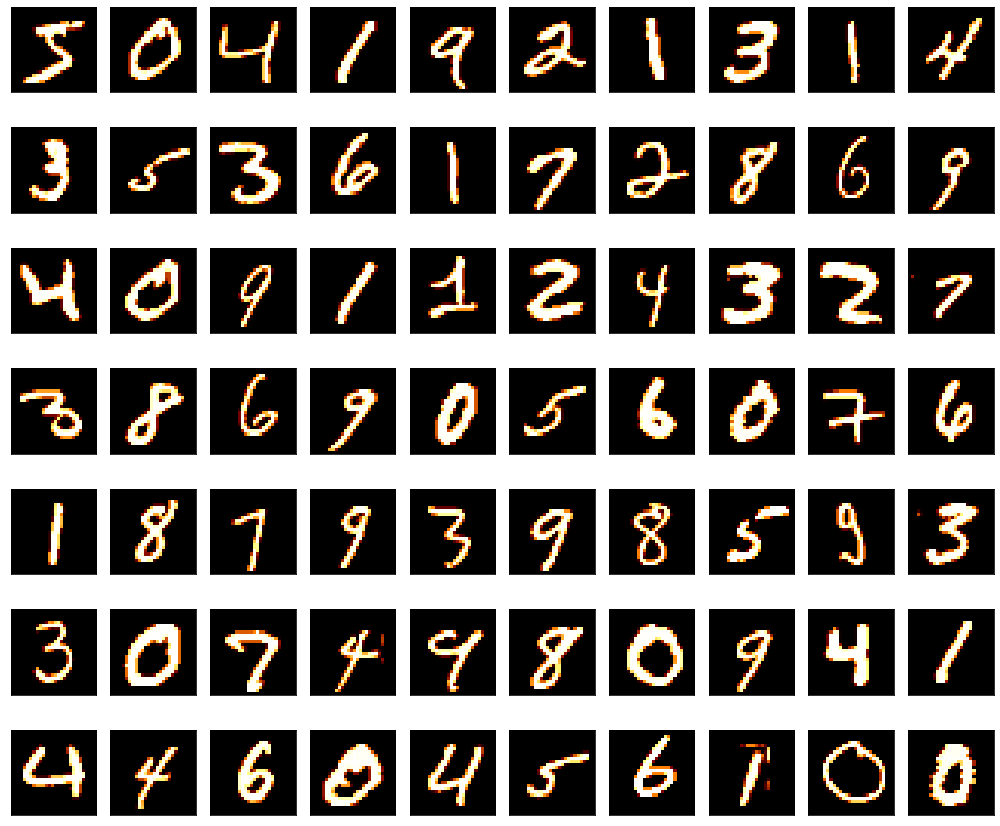

In [129]:
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = X.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

Text(0.5, 1.0, 'Number: 3')

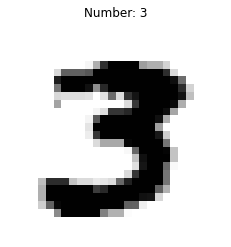

In [130]:
plt.imshow(np.array(X.iloc[i]).reshape((28,28)), cmap = plt.cm.gray_r)
plt.axis('off')
plt.title('Number: '+ str(y[i]))


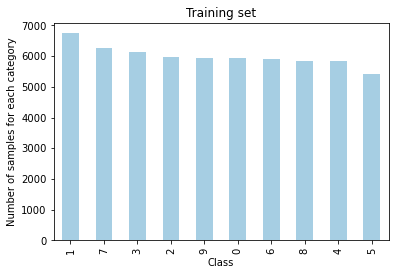

In [131]:
y.value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()

In [132]:
# X_submission.head()


# K-NN

In [133]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.2, random_state=13)

# knn.score(X_test,y_test)

In [134]:
print(X_train.shape, X_test.shape , y_test.shape, y_train.shape)

(48000, 784) (12000, 784) (12000,) (48000,)


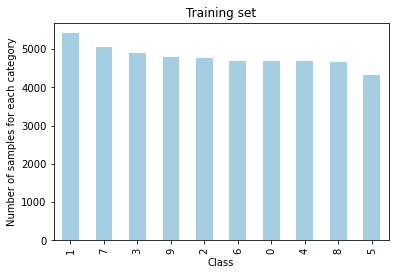

Total examples in training set are :  48000


In [135]:
y_train.value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()
print('Total examples in training set are : ',y_train.shape[0])

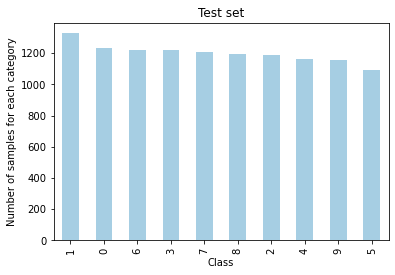

Total examples in Test set are :  12000


In [136]:
y_test.value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Test set')
plt.show()
print('Total examples in Test set are : ',y_test.shape[0])

In [137]:
knn=KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [138]:
%%timeit -n 1 -r 1 
print(knn.score(X_test.iloc[0:1000],y_test.iloc[0:1000]))

0.966
10.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [139]:
test_predictions=knn.predict(X_test[:1000])

In [140]:
index = 0
misclassified_images = []
for label, predict in zip(y_test[:1000], test_predictions):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)

[26, 55, 111, 121, 140, 143, 360, 377, 421, 451, 472, 488, 526, 537, 538, 572, 575, 595, 610, 645, 686, 728, 733, 771, 785, 793, 872, 890, 894, 927, 945, 970, 987, 990]


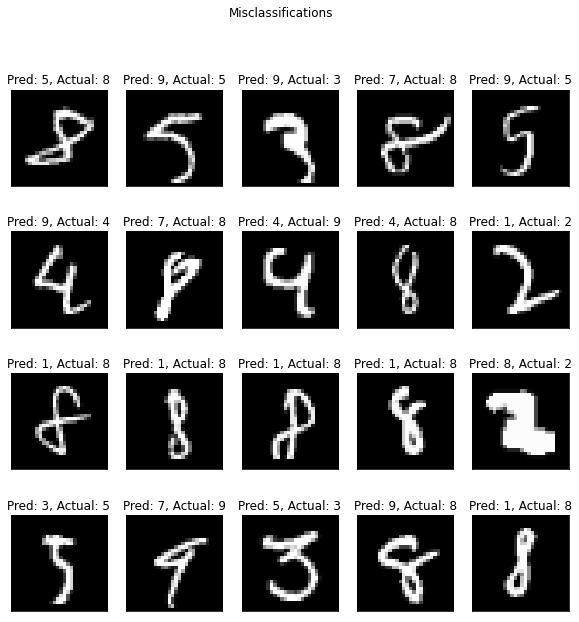

In [141]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test.iloc[bad_index].to_numpy().reshape(28,28), cmap=plt.cm.gray)
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {test_predictions[bad_index]}, Actual: {y_test.iloc[bad_index]}');

## PCA

In [64]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

print(pca.explained_variance_ratio_)

[0.09696506 0.07099161]


In [65]:
print(X_train.shape)
print(pca_result.shape)

(48000, 784)
(48000, 2)


In [79]:
n_components = 30
pca1 = PCA(n_components=n_components).fit(X_train.values)

eigenvalues = pca1.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
#eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca1.components_

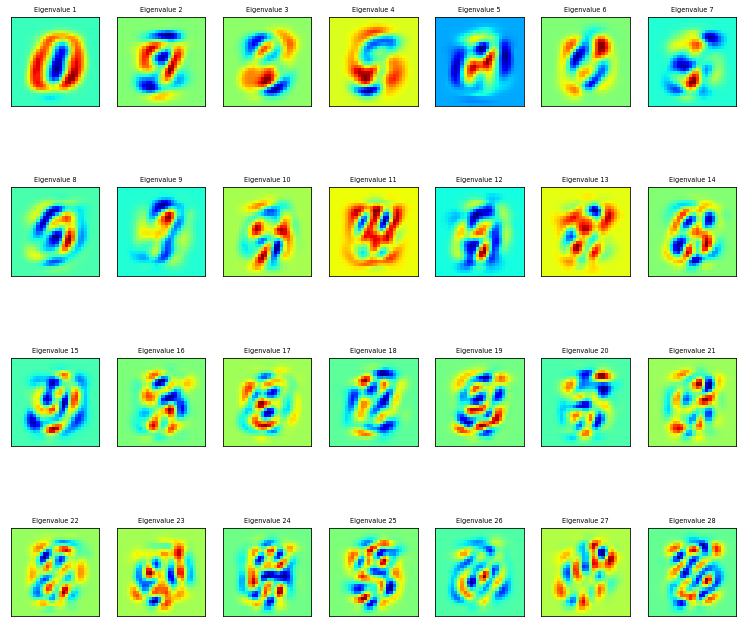

In [80]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

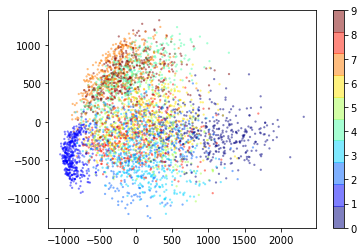

In [66]:
plt.scatter(pca_result[:4000, 0], pca_result[:4000, 1], c=y_train[:4000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

Text(0, 0.5, 'Cumulative explained variance')

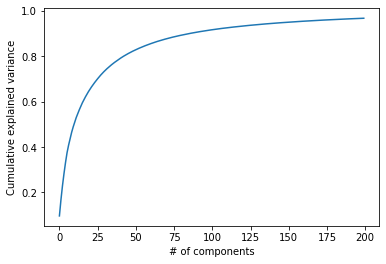

In [67]:
pca = PCA(200)
pca_full = pca.fit(X_train)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

In [68]:
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
# X_submission_transformed = pca.transform(X_submission)

In [69]:


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_train_transformed, y_train, test_size=0.2, random_state=13)


In [70]:
components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
neighbors = [1, 2, 3, 4, 5, 6, 7]

scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )

In [41]:


for component in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca[:,:component], y_train_pca)
        score = knn.score(X_test_pca[:,:component], y_test_pca)
        #predict = knn.predict(X_test_pca[:,:component])
        scores[component][n] = score
        
        print('Components = ', component, ', neighbors = ', n,', Score = ', score)   

Components =  5 , neighbors =  1 , Score =  0.6805208333333334
Components =  5 , neighbors =  2 , Score =  0.6767708333333333
Components =  5 , neighbors =  3 , Score =  0.71
Components =  5 , neighbors =  4 , Score =  0.7208333333333333
Components =  5 , neighbors =  5 , Score =  0.7325
Components =  5 , neighbors =  6 , Score =  0.7345833333333334
Components =  5 , neighbors =  7 , Score =  0.7365625
Components =  10 , neighbors =  1 , Score =  0.9117708333333333
Components =  10 , neighbors =  2 , Score =  0.9072916666666667
Components =  10 , neighbors =  3 , Score =  0.9228125
Components =  10 , neighbors =  4 , Score =  0.9240625
Components =  10 , neighbors =  5 , Score =  0.9236458333333334
Components =  10 , neighbors =  6 , Score =  0.925
Components =  10 , neighbors =  7 , Score =  0.9234375
Components =  15 , neighbors =  1 , Score =  0.9496875
Components =  15 , neighbors =  2 , Score =  0.9444791666666666
Components =  15 , neighbors =  3 , Score =  0.9521875
Components =

Text(0.5, 1.0, 'KNN score heatmap')

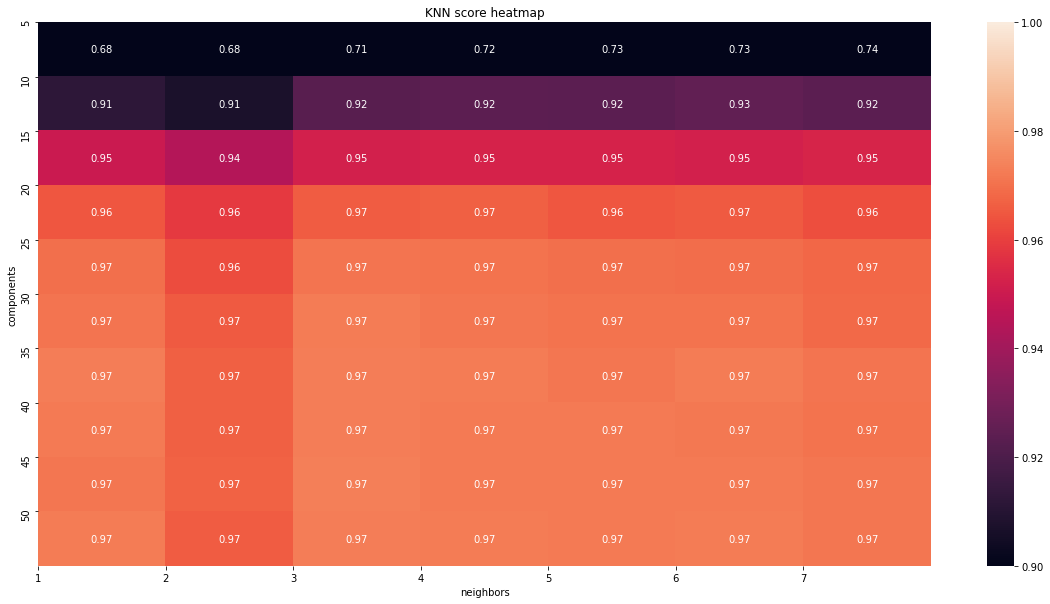

In [43]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))

x = [0, 1, 2, 3, 4, 5, 6]
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# plt.rcParams["axes.grid"] = False

# fig, ax = plt.subplots()
# plt.imshow(scores, cmap='hot', interpolation='none', vmin=.90, vmax=1)
# plt.xlabel('neighbors')
# plt.ylabel('components')
# plt.xticks(x, neighbors)
# plt.yticks(y, components)
# plt.title('KNN score heatmap')

# plt.colorbar()
# plt.show()
plt.figure(figsize=(20,10))
sns.heatmap(scores,vmin=.90, vmax=1,annot=True)
plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(x, neighbors)
plt.yticks(y, components)
plt.title('KNN score heatmap')


In [71]:
knnpca = KNeighborsClassifier(n_neighbors=5)
knnpca.fit(X_train_pca[:, :35], y_train_pca)

# predict_labels = knn.predict(X_submission_transformed[:, :35])

KNeighborsClassifier()

In [78]:
%%timeit -n 1 -r 1
print(knnpca.score(X_test_pca[:,:35][:1000],y_test_pca[:1000]))

0.979
1.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [77]:
%%timeit -n 1 -r 1
print(knnpca.score(X_test_pca[:,:35][:],y_test_pca[:]))

0.9711458333333334
13.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [90]:
from sklearn.metrics import plot_confusion_matrix

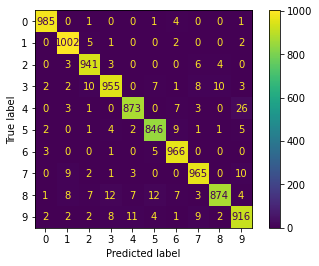

In [94]:
plot_confusion_matrix(knnpca,X_test_pca[:,:35],y_test_pca)

# Conclusion

<h4> Applying PCA on the data and reducing the dimensionality of the data , significantly reduces the computatation time and space required and also gives better generalization accuracy and helps to prevent overfitting. <br> <br>
    97.9% accuracy is achieved on the test dataset
    